In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats



Read the file

In [51]:
# Read the Excel file
file_path = os.path.join('data', 'Booking_Data.xlsx')
df = pd.read_excel(file_path)

# Display the dataframe
print(df)


        Booking ID   Hotel Booking Date Arrival Date  Lead Time  Nights  \
0                1  Resort   2014-07-24   2015-07-01        342       0   
1                2  Resort   2013-06-24   2015-07-01        737       0   
2                3  Resort   2015-06-24   2015-07-01          7       1   
3                4  Resort   2015-06-18   2015-07-01         13       1   
4                5  Resort   2015-06-17   2015-07-01         14       2   
...            ...     ...          ...          ...        ...     ...   
119385      119386    City   2017-08-07   2017-08-30         23       7   
119386      119387    City   2017-05-21   2017-08-31        102       7   
119387      119388    City   2017-07-28   2017-08-31         34       7   
119388      119389    City   2017-05-14   2017-08-31        109       7   
119389      119390    City   2017-02-05   2017-08-29        205       9   

        Guests  Distribution Channel Customer Type         Country  \
0            2               

**Data Exploration and Preprocessing**

Data Inspection

In [52]:
#check the shape of dataset
df.shape

(119390, 17)

In [53]:
df.columns

Index(['Booking ID', 'Hotel', 'Booking Date', 'Arrival Date', 'Lead Time',
       'Nights', 'Guests', 'Distribution Channel', 'Customer Type', 'Country',
       'Deposit Type', 'Avg Daily Rate', 'Status', 'Status Update',
       'Cancelled (0/1)', 'Revenue', 'Revenue Loss'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Booking ID            119390 non-null  int64         
 1   Hotel                 119390 non-null  object        
 2   Booking Date          119390 non-null  datetime64[ns]
 3   Arrival Date          119390 non-null  datetime64[ns]
 4   Lead Time             119390 non-null  int64         
 5   Nights                119390 non-null  int64         
 6   Guests                119390 non-null  int64         
 7   Distribution Channel  119390 non-null  object        
 8   Customer Type         119390 non-null  object        
 9   Country               118902 non-null  object        
 10  Deposit Type          119390 non-null  object        
 11  Avg Daily Rate        119390 non-null  float64       
 12  Status                119390 non-null  object        
 13 

Handling Missing and Duplicate values

In [55]:
#checking for duplicate values
print(df.duplicated().sum())
# Check for missing/null values in Dataset
print(df.isnull().sum())
# check for NaN values
print(df.isna().sum())

0
Booking ID                0
Hotel                     0
Booking Date              0
Arrival Date              0
Lead Time                 0
Nights                    0
Guests                    0
Distribution Channel      0
Customer Type             0
Country                 488
Deposit Type              0
Avg Daily Rate            0
Status                    0
Status Update             0
Cancelled (0/1)           0
Revenue                   0
Revenue Loss              0
dtype: int64
Booking ID                0
Hotel                     0
Booking Date              0
Arrival Date              0
Lead Time                 0
Nights                    0
Guests                    0
Distribution Channel      0
Customer Type             0
Country                 488
Deposit Type              0
Avg Daily Rate            0
Status                    0
Status Update             0
Cancelled (0/1)           0
Revenue                   0
Revenue Loss              0
dtype: int64


There are no duplicate values but there are 488 Null or Missing values of Country Col in Dataset

In [56]:
#checking category of features whoes having null values
print(df.Country.value_counts())

Country
Portugal          48590
United Kingdom    12129
France            10415
Spain              8568
Germany            7287
                  ...  
Djibouti              1
Botswana              1
Honduras              1
Virgin Islands        1
Sierra Leone          1
Name: count, Length: 174, dtype: int64


We can see Portugal is most frequent country, so replacing null values with the most frequent Country.


In [57]:
# Replacing null values with the most frequent value in a variable
df['Country'] = df['Country'].fillna(df['Country'].mode()[0])


In [58]:
#check the null values now after replacing
print(df.isnull().sum())

Booking ID              0
Hotel                   0
Booking Date            0
Arrival Date            0
Lead Time               0
Nights                  0
Guests                  0
Distribution Channel    0
Customer Type           0
Country                 0
Deposit Type            0
Avg Daily Rate          0
Status                  0
Status Update           0
Cancelled (0/1)         0
Revenue                 0
Revenue Loss            0
dtype: int64


Null Values have been replaced

Now lets look in to basic statistical details of data

In [59]:
#basic statistics of dataset
df.describe()


,Booking ID,Booking Date,Arrival Date,Lead Time,Nights,Guests,Avg Daily Rate,Status Update,Cancelled (0/1),Revenue,Revenue Loss
count,119390.000000,119390,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000
mean,59695.500000,2016-05-16 16:23:19.353379840,2016-08-28 16:39:45.727447808,104.011416,3.427900,1.968239,101.831122,2016-07-30 00:24:47.883407104,0.370416,247.931966,-109.916242
min,1.000000,2013-06-24 00:00:00,2015-07-01 00:00:00,0.000000,0.000000,0.000000,-6.380000,2014-10-17 00:00:00,0.000000,-63.800000,-6300.000000
25%,29848.250000,2015-11-28 00:00:00,2016-03-13 00:00:00,18.000000,2.000000,2.000000,69.290000,2016-02-01 00:00:00,0.000000,0.000000,0.000000
50%,59695.500000,2016-05-04 00:00:00,2016-09-06 00:00:00,69.000000,3.000000,2.000000,94.575000,2016-08-07 00:00:00,0.000000,176.000000,0.000000
75%,89542.750000,2016-12-09 00:00:00,2017-03-18 00:00:00,160.000000,4.000000,2.000000,126.000000,2017-02-08 00:00:00,1.000000,342.977500,0.000000
max,119390.000000,2017-08-31 00:00:00,2017-08-31 00:00:00,737.000000,69.000000,55.000000,5400.000000,2017-09-14 00:00:00,1.000000,7590.000000,0.000000
std,34465.068657,NaN,NaN,106.863097,2.557439,0.722394,50.535790,NaN,0.482918,300.921393,277.102641


In [60]:
#drop booking_id column
df = df.drop('Booking ID', axis=1)


In [61]:
print(df.head())

    Hotel Booking Date Arrival Date  Lead Time  Nights  Guests  \
0  Resort   2014-07-24   2015-07-01        342       0       2   
1  Resort   2013-06-24   2015-07-01        737       0       2   
2  Resort   2015-06-24   2015-07-01          7       1       1   
3  Resort   2015-06-18   2015-07-01         13       1       1   
4  Resort   2015-06-17   2015-07-01         14       2       2   

  Distribution Channel Customer Type         Country Deposit Type  \
0               Direct     Transient        Portugal   No Deposit   
1               Direct     Transient        Portugal   No Deposit   
2               Direct     Transient  United Kingdom   No Deposit   
3            Corporate     Transient  United Kingdom   No Deposit   
4  Online Travel Agent     Transient  United Kingdom   No Deposit   

   Avg Daily Rate     Status Status Update  Cancelled (0/1)  Revenue  \
0             0.0  Check-Out    2015-07-01                0      0.0   
1             0.0  Check-Out    2015-07-01  

Handling Outliers for Numerical Variables

In [62]:
numerical_variables = df.select_dtypes(include='number').columns.tolist()
print(numerical_variables)



['Lead Time', 'Nights', 'Guests', 'Avg Daily Rate', 'Cancelled (0/1)', 'Revenue', 'Revenue Loss']


Even though Cancelled, Number of guests are numerical but doesn't belong to continuos numerical variable where we can find outliers. 
So, find continous numerical variables and handle the outliers of it


In [63]:
discrete_variables = [var for var in numerical_variables if df[var].nunique() < 150]
continuous_variables = [var for var in numerical_variables if var not in discrete_variables]

print("Discrete Variables:")
print(discrete_variables)

print("Continuous Variables:")
print(continuous_variables)


Discrete Variables:
['Nights', 'Guests', 'Cancelled (0/1)']
Continuous Variables:
['Lead Time', 'Avg Daily Rate', 'Revenue', 'Revenue Loss']


Therefore, Lead Time, Avg Daily Rate, Revenue and Revenue Loss are our actual numerical variables


Checking for Outliers


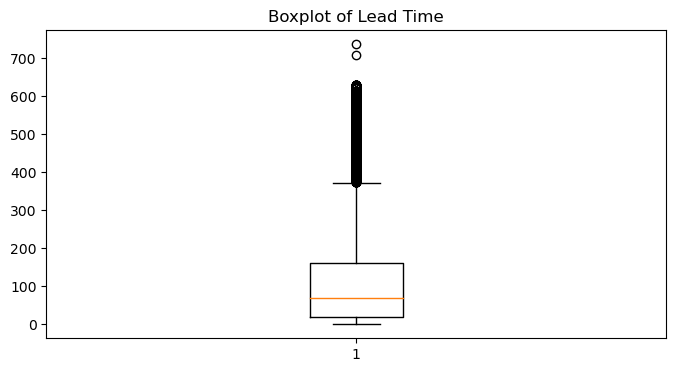

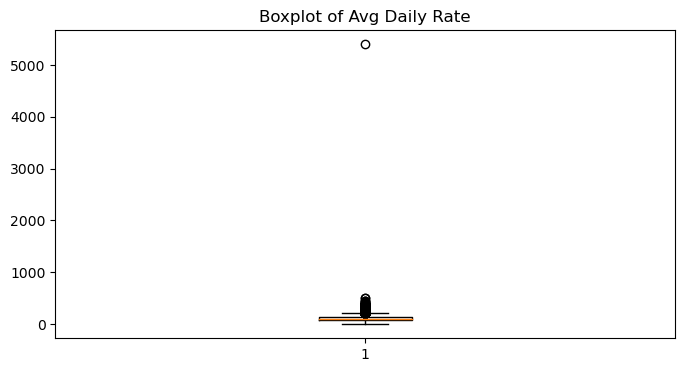

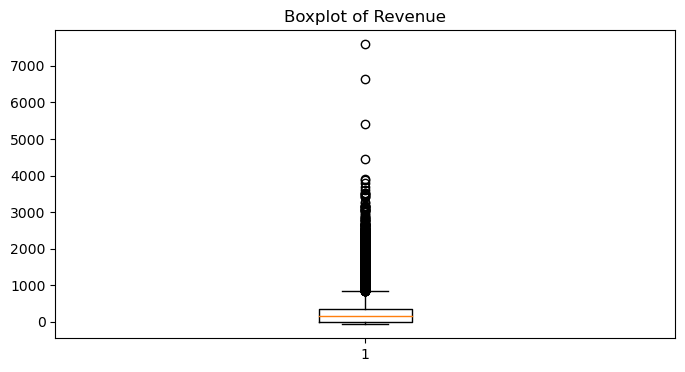

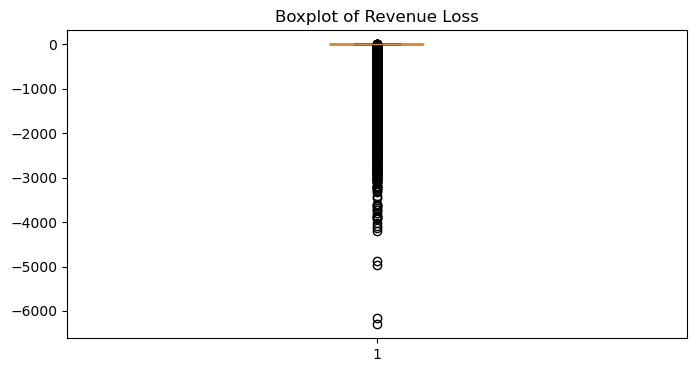

In [64]:
# Create box plots for continuous variables
for var in continuous_variables:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[var])
    plt.title(f'Boxplot of {var}')
    plt.show()


We can see there are outliers in all the numerical variables

In [65]:
# Calculate z-scores for the numerical variables
z_scores = stats.zscore(df[continuous_variables])

# Create a DataFrame with z-scores
z_scores_df = pd.DataFrame(z_scores, columns=continuous_variables)

# Remove rows with z-scores greater than the threshold
df_no_outliers = df[(z_scores_df.abs() < threshold).all(axis=1)]

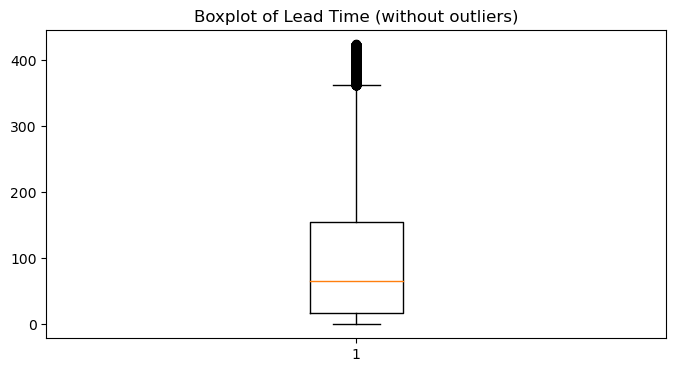

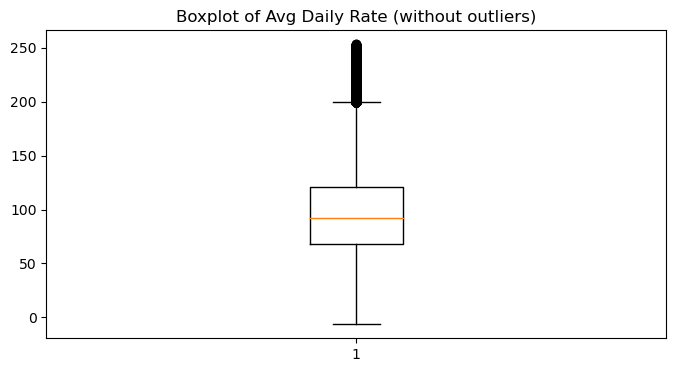

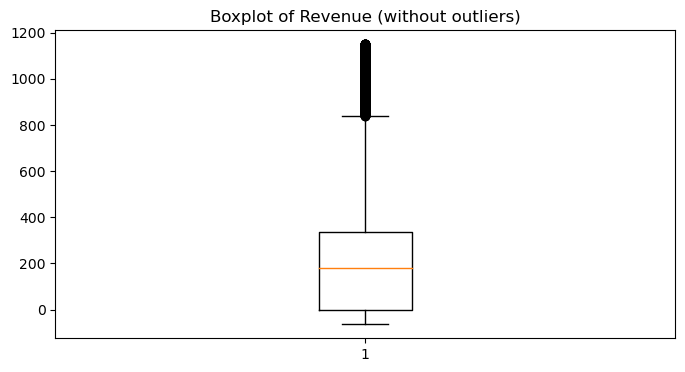

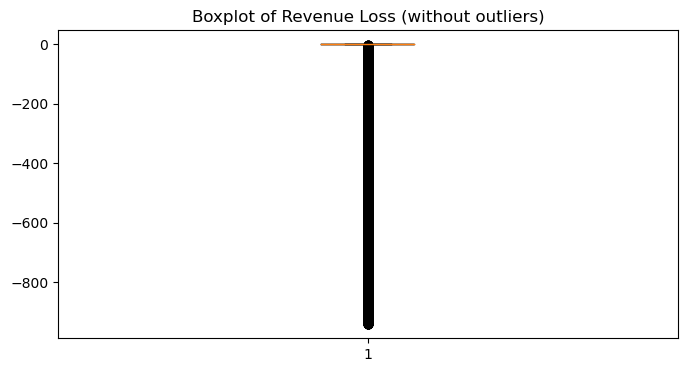

In [66]:
# Create box plots for continuous variables in df_no_outliers
for var in continuous_variables:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df_no_outliers[var])
    plt.title(f'Boxplot of {var} (without outliers)')
    plt.show()


In [67]:
#describe data without outliers
df_no_outliers.describe()


,Booking Date,Arrival Date,Lead Time,Nights,Guests,Avg Daily Rate,Status Update,Cancelled (0/1),Revenue,Revenue Loss
count,112123,112123,112123.000000,112123.000000,112123.000000,112123.000000,112123,112123.000000,112123.000000,112123.000000
mean,2016-05-15 07:11:26.171436544,2016-08-21 13:38:46.163231744,98.268981,3.180846,1.936249,97.482680,2016-07-25 19:08:57.834342656,0.357902,225.610616,-80.744680
min,2014-06-09 00:00:00,2015-07-01 00:00:00,0.000000,0.000000,0.000000,-6.380000,2014-10-17 00:00:00,0.000000,-63.800000,-941.000000
25%,2015-11-28 00:00:00,2016-03-05 00:00:00,17.000000,2.000000,2.000000,68.000000,2016-02-01 00:00:00,0.000000,0.000000,0.000000
50%,2016-05-02 00:00:00,2016-08-30 00:00:00,66.000000,3.000000,2.000000,92.000000,2016-08-01 00:00:00,0.000000,178.200000,0.000000
75%,2016-12-07 00:00:00,2017-03-09 00:00:00,155.000000,4.000000,2.000000,120.600000,2017-02-02 00:00:00,1.000000,336.000000,0.000000
max,2017-08-31 00:00:00,2017-08-31 00:00:00,424.000000,57.000000,55.000000,253.330000,2017-09-10 00:00:00,1.000000,1150.050000,0.000000
std,NaN,NaN,98.677515,2.076325,0.700093,42.372173,NaN,0.479385,228.377381,176.720129


**Feature Engineering**

In [68]:
df_no_outliers.head()

,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0
5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


In [69]:
# Checking info of newly formed dataset after removed outliers
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112123 entries, 0 to 119388
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Hotel                 112123 non-null  object        
 1   Booking Date          112123 non-null  datetime64[ns]
 2   Arrival Date          112123 non-null  datetime64[ns]
 3   Lead Time             112123 non-null  int64         
 4   Nights                112123 non-null  int64         
 5   Guests                112123 non-null  int64         
 6   Distribution Channel  112123 non-null  object        
 7   Customer Type         112123 non-null  object        
 8   Country               112123 non-null  object        
 9   Deposit Type          112123 non-null  object        
 10  Avg Daily Rate        112123 non-null  float64       
 11  Status                112123 non-null  object        
 12  Status Update         112123 non-null  datetime64[ns]
 13  Canc

In [70]:
# Change datatype of variables Avg Daily Rate, Revenue and Revenue Loss to correct format from float64 to int64
df_no_outliers['Avg Daily Rate'] = df_no_outliers['Avg Daily Rate'].astype(int)
df_no_outliers['Revenue'] = df_no_outliers['Revenue'].astype(int)
df_no_outliers['Revenue Loss'] = df_no_outliers['Revenue Loss'].astype(int)

C:\Users\1ga17\AppData\Local\Temp\ipykernel_6288\1075346829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Avg Daily Rate'] = df_no_outliers['Avg Daily Rate'].astype(int)
C:\Users\1ga17\AppData\Local\Temp\ipykernel_6288\1075346829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Revenue'] = df_no_outliers['Revenue'].astype(int)
C:\Users\1ga17\AppData\Local\Temp\ipykernel_6288\1075346829.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [71]:
#checking unique values in each variable
for var in df_no_outliers.columns:
    print(var, df_no_outliers[var].unique())

Hotel ['Resort' 'City']
Booking Date <DatetimeArray>
['2014-07-24 00:00:00', '2015-06-24 00:00:00', '2015-06-18 00:00:00',
 '2015-06-17 00:00:00', '2015-07-01 00:00:00', '2015-06-22 00:00:00',
 '2015-04-07 00:00:00', '2015-04-17 00:00:00', '2015-06-08 00:00:00',
 '2015-05-27 00:00:00',
 ...
 '2015-04-28 00:00:00', '2015-07-26 00:00:00', '2015-05-17 00:00:00',
 '2015-09-20 00:00:00', '2014-10-17 00:00:00', '2015-09-27 00:00:00',
 '2015-01-20 00:00:00', '2015-02-01 00:00:00', '2015-02-17 00:00:00',
 '2015-11-22 00:00:00']
Length: 970, dtype: datetime64[ns]
Arrival Date <DatetimeArray>
['2015-07-01 00:00:00', '2015-07-02 00:00:00', '2015-07-03 00:00:00',
 '2015-07-04 00:00:00', '2015-07-05 00:00:00', '2015-07-06 00:00:00',
 '2015-07-07 00:00:00', '2015-07-08 00:00:00', '2015-07-09 00:00:00',
 '2015-07-10 00:00:00',
 ...
 '2016-01-20 00:00:00', '2015-12-09 00:00:00', '2017-03-21 00:00:00',
 '2016-01-11 00:00:00', '2015-12-16 00:00:00', '2015-11-22 00:00:00',
 '2015-12-08 00:00:00', '2016-0

In [76]:
#convert negative values of revenue loss in to positive
df_no_outliers['Revenue Loss'] = df_no_outliers['Revenue Loss'].abs()

#checking the dataset after converting negative values of revenue loss in to positive
print(df_no_outliers.head())
#checking unique values in each variable
for var in df_no_outliers.columns:
    print(var, df_no_outliers[var].unique())

    Hotel Booking Date Arrival Date  Lead Time  Nights  Guests  \
0  Resort   2014-07-24   2015-07-01        342       0       2   
2  Resort   2015-06-24   2015-07-01          7       1       1   
3  Resort   2015-06-18   2015-07-01         13       1       1   
4  Resort   2015-06-17   2015-07-01         14       2       2   
5  Resort   2015-06-17   2015-07-01         14       2       2   

  Distribution Channel Customer Type         Country Deposit Type  \
0               Direct     Transient        Portugal   No Deposit   
2               Direct     Transient  United Kingdom   No Deposit   
3            Corporate     Transient  United Kingdom   No Deposit   
4  Online Travel Agent     Transient  United Kingdom   No Deposit   
5  Online Travel Agent     Transient  United Kingdom   No Deposit   

   Avg Daily Rate     Status Status Update  Cancelled (0/1)  Revenue  \
0               0  Check-Out    2015-07-01                0        0   
2              75  Check-Out    2015-07-02  

C:\Users\1ga17\AppData\Local\Temp\ipykernel_6288\1525832969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Revenue Loss'] = df_no_outliers['Revenue Loss'].abs()


In [83]:
# Creating 'guest_category' from variable 'Guests' where 1: single, 2 : couple or more :family
df_no_outliers['Guest Category'] = df_no_outliers['Guests'].apply(lambda x: 'single' if x == 1 else ('couple' if x == 2 else 'family'))

# Creating 'lead_time_category' from 'Lead Time' variale to display category
df_no_outliers['Lead Time Category'] = df_no_outliers['Lead Time'].apply(lambda x: 'short' if x <= 30 else ('medium' if x <= 60 else 'long'))

# Creating 'stay_duration_category' from 'Nights' variable to display category
df_no_outliers['Stay Duration Category'] = df_no_outliers['Nights'].apply(lambda x: 'short' if x <= 3 else ('medium' if x <= 7 else 'long'))

# Creating 'revenue_category' from 'Revenue' variable to display category
df_no_outliers['Revenue Category'] = df_no_outliers['Revenue'].apply(lambda x: 'low' if x <= 100 else ('medium' if x <= 200 else 'high'))

# Creating 'revenue_loss_category' from 'Revenue Loss' variable to display category
df_no_outliers['Revenue Loss Category'] = df_no_outliers['Revenue Loss'].apply(lambda x: 'low' if x <= 100 else ('medium' if x <= 200 else 'high'))

# Creating 'adr_category' from 'Avg Daily Rate' variable to display category
df_no_outliers['ADR Category'] = df_no_outliers['Avg Daily Rate'].apply(lambda x: 'low' if x <= 100 else ('medium' if x <= 200 else 'high'))

# Creating 'booking_year' from 'Booking Date' variable to display month
df_no_outliers['Booking Year'] = df_no_outliers['Booking Date'].dt.year
# Creating 'booking_month' from 'Booking Date' variable to display month
df_no_outliers['Booking Month'] = df_no_outliers['Booking Date'].dt.month_name()
# Creating 'booking_day' from 'Booking Date' variable to display day
df_no_outliers['Booking Day'] = df_no_outliers['Booking Date'].dt.day_name()

# Creating 'Arrival Year' from 'Arrival Date' variable to display month
df_no_outliers['Arrival Year'] = df_no_outliers['Arrival Date'].dt.year
# Creating 'Arrival Month' from 'Arrival Date' variable to display month
df_no_outliers['Arrival Month'] = df_no_outliers['Arrival Date'].dt.month_name()
# Creating 'Arrival Day' from 'Arrival Date' variable to display day
df_no_outliers['Arrival Day'] = df_no_outliers['Arrival Date'].dt.day_name()

#check dataset after creating new variables
df_no_outliers.head()

,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,...,Stay Duration Category,Revenue Category,Revenue Loss Category,ADR Category,Booking Month,Booking Day,Arrival Month,Arrival Day,Booking Year,Arrival Year
0,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,...,short,low,low,low,July,Thursday,July,Wednesday,2014,2015
2,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,...,short,low,low,low,June,Wednesday,July,Wednesday,2015,2015
3,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,...,short,low,low,low,June,Thursday,July,Wednesday,2015,2015
4,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,...,short,medium,low,low,June,Wednesday,July,Wednesday,2015,2015
5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,...,short,medium,low,low,June,Wednesday,July,Wednesday,2015,2015


In [84]:
#shape of dataset after creating new variables
df_no_outliers.shape

(111944, 28)

Check for rows with 0 guests

In [85]:
# Remove rows having value 0 in Guests variable
df_no_outliers = df_no_outliers[df_no_outliers['Guests'] != 0]
df_no_outliers.shape

(111944, 28)

As there cannot be 0 guests, rows with 0 guests are removed

In [86]:
# Checking info of new dataset
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111944 entries, 0 to 119388
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Hotel                   111944 non-null  object        
 1   Booking Date            111944 non-null  datetime64[ns]
 2   Arrival Date            111944 non-null  datetime64[ns]
 3   Lead Time               111944 non-null  int64         
 4   Nights                  111944 non-null  int64         
 5   Guests                  111944 non-null  int64         
 6   Distribution Channel    111944 non-null  object        
 7   Customer Type           111944 non-null  object        
 8   Country                 111944 non-null  object        
 9   Deposit Type            111944 non-null  object        
 10  Avg Daily Rate          111944 non-null  int32         
 11  Status                  111944 non-null  object        
 12  Status Update           111944 non-

Exporting dataset for further visualization in Tableau

In [87]:
#export the dataset to new csv file
df_no_outliers.to_csv('data/Booking_Data_Cleaned.csv', index=False)

**Exploratory Data Analysis**

Univariate Analysis

In [ ]:
#performing univariate analysis
# performing univariate analysis on "Hotel", "Cancelled", ""